<a href="https://colab.research.google.com/github/safdarjung/projects/blob/main/classification_dl.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
(x_train,y_train),(x_test,y_test)=datasets.cifar10.load_data()
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [ ]:
classes=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

In [ ]:
def plot_sample(x,y,index):
  plt.figure(figsize=(15,2))
  plt.imshow(x_train[index])
  plt.xlabel(str(classes[y[index]]))

TypeError: ignored

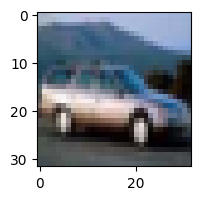

In [ ]:
plot_sample(x_train,y_train,4)

In [ ]:
#standardising
x_train=x_train/255
x_test=x_train/255

In [ ]:
#  # ANN model
# ann = models.Sequential([
#     layers.Flatten(input_shape=(32,32,3)),
#     layers.Dense(3000,activation='relu'),
#     layers.Dense(2000,activation='relu'),
#     layers.Dense(1000,activation='relu'),
#     layers.Dense(10,activation='softmax')
# ])
# ann.compile(optimizer='SGD',
#             loss='sparse_categorical_crossentropy',
#             metrics=['accuracy'])
# ann.fit(x_train,y_train,epochs=10)

In [ ]:
#ann performs very badly for images, so cnn is used

cnn = models.Sequential([
    layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(32,activation='relu'),
    layers.Dense(10,activation='softmax')
])
cnn.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])
cnn.fit(x_train,y_train,epochs=10)

In [ ]:
cnn.evaluate(x_test,y_test)